# Data Understanding and Tokenization

# Load of datasets

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directory = '/content/drive/My Drive/TA'

In [0]:
import numpy as np
import pandas as pd
# readings of the .tsv files
en = pd.read_csv(directory+"/en_training.tsv",sep='\t')
it = pd.read_csv(directory+"/it_training.tsv", sep="\t")

# Data Understanding

## General semantics

In [0]:
# imports 
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from scipy.stats.stats import pearsonr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# visualization of the first 5 records, for example
en.head()

id                                               text  misogynous  \
0   1  Please tell me why the bitch next to me in the...           1   
1   2  @emmasharp003 @Ldrake48Lee Bitch shut the fuck up           1   
2   3      @abzdafab Dear cunt, please shut the fuck up.           1   
3   4    RT @queenofdragonsb: Pls shut the fuck up bitch           1   
4   5  RT @21bIvck: "when u gonna get your license" S...           1   

  misogyny_category  target  
0         dominance  active  
1         dominance  active  
2         dominance  active  
3         dominance  active  
4         dominance  active

In [0]:
# visualization of the first 5 records, for example
it.head()

id                                               text  misogynous  \
0   1  @KassemAmin4 @Laylasexgdr Fatti trovare  te lo...           1   
1   2  @meb Tu dovresti ricominciare dai semafori a f...           1   
2   3  Amore,sei presentabile? Xchè così via Skype ti...           1   
3   4  @Il_nulla Salvo poi mandare la culona a Mosca,...           1   
4   5  @GiorgiaMeloni @FratellidItaIia Vediamo Gentil...           1   

   misogyny_category  target  
0  sexual_harassment  active  
1          dominance  active  
2         stereotype  active  
3         stereotype  active  
4         stereotype  active

In [0]:
# generic information about the data such as attributes' names, types and size
en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
id                   4000 non-null int64
text                 4000 non-null object
misogynous           4000 non-null int64
misogyny_category    4000 non-null object
target               4000 non-null object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB


In [0]:
# generic information about the data such as attributes' names, types and size
it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
id                   4000 non-null int64
text                 4000 non-null object
misogynous           4000 non-null int64
misogyny_category    4000 non-null object
target               4000 non-null object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB


## Data quality (missing values, outliers, mispelled words) 

In [0]:
# checking for all columns if they contain any missing values
en.isnull().any()

id                   False
text                 False
misogynous           False
misogyny_category    False
target               False
dtype: bool

In [0]:
# automatic sum of the missing values for every column 
en.isnull().sum()

id                   0
text                 0
misogynous           0
misogyny_category    0
target               0
dtype: int64

In [0]:
enTarget=en[en['misogynous']!=0]
enTarget['target'].value_counts()

active     1058
passive     727
Name: target, dtype: int64

In [0]:
itTarget=it[it['misogynous']!=0]
itTarget['target'].value_counts()

active     1721
passive      96
0            10
pass          1
Name: target, dtype: int64

In [0]:
# normalize pass as passive
itTarget['target'][itTarget["target"]=="pass"]="passive"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
itTarget['target'].value_counts()

active     1721
passive      97
0            10
Name: target, dtype: int64

In [0]:
itTarget['target'][itTarget["target"]=="0"]=np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
itTarget['target'].value_counts()

active     1721
passive      97
Name: target, dtype: int64

In [0]:
it['target'] = itTarget['target']

In [0]:
it['target'].value_counts()

active     1721
passive      97
Name: target, dtype: int64

## Distribution of the variables and categories' statistics 

In [0]:
# counting values in the english dataset of 'misogynous', the primary class label 
en['misogynous'].value_counts()

0    2215
1    1785
Name: misogynous, dtype: int64

In [0]:
# counting values in the italian dataset of 'misogynous', the primary class label 
it['misogynous'].value_counts()

0    2172
1    1828
Name: misogynous, dtype: int64

In [0]:
# counting misogyny_category in eng 
enCategory=en[en['misogynous']!=0]
enCategory['misogyny_category'].value_counts()

discredit            1014
sexual_harassment     352
stereotype            179
dominance             148
derailing              92
Name: misogyny_category, dtype: int64

In [0]:
# counting misogyny_category in it
itCategory=it[it['misogynous']!=0]
itCategory['misogyny_category'].value_counts()

stereotype           668
discredit            634
sexual_harassment    431
dominance             71
derailing             24
Name: misogyny_category, dtype: int64

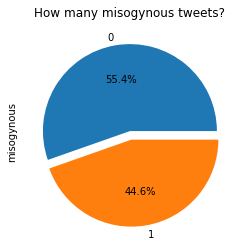

In [0]:
# pie chart counting misogynous in en
en['misogynous'].value_counts().plot(kind='pie', 
                                   title='How many misogynous tweets?',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))
plt.show()

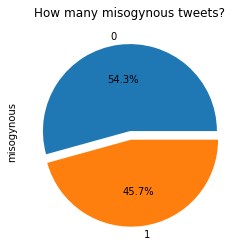

In [0]:
# pie chart counting misogynous in it 
it['misogynous'].value_counts().plot(kind='pie', 
                                   title='How many misogynous tweets?',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))
plt.show()

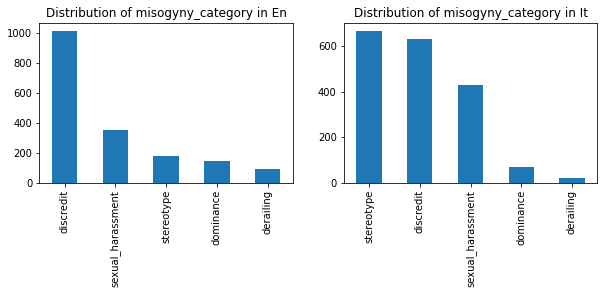

In [0]:
# grid 
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
enCategory['misogyny_category'].value_counts().plot(kind='bar', stacked=True)
plt.title('Distribution of misogyny_category in En')

plt.subplot2grid(fig_dims, (0, 1))
itCategory['misogyny_category'].value_counts().plot(kind='bar', stacked=True)
plt.title('Distribution of misogyny_category in It')

plt.show()

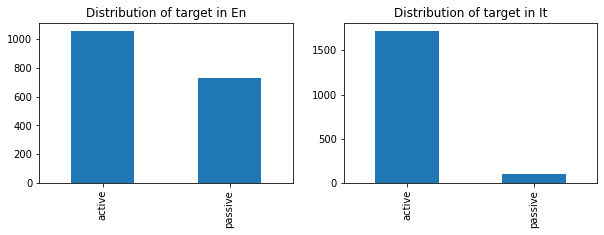

In [0]:
# grid 
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
enTarget['target'].value_counts().plot(kind='bar', stacked=True)
plt.title('Distribution of target in En')

plt.subplot2grid(fig_dims, (0, 1))
itTarget['target'].value_counts().plot(kind='bar', stacked=True)
plt.title('Distribution of target in It')

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

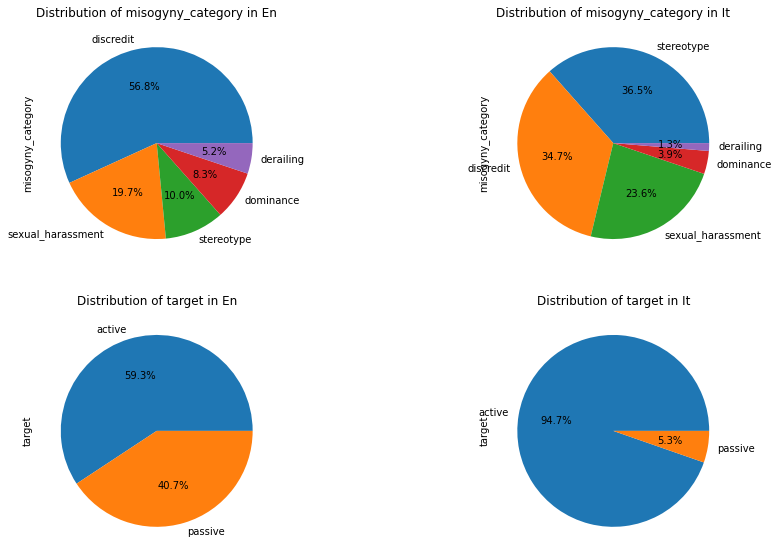

In [0]:
# grid 
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
enCategory['misogyny_category'].value_counts().plot(kind='pie',
                                   autopct='%1.1f%%')
plt.title('Distribution of misogyny_category in En')

plt.subplot2grid(fig_dims, (0, 1))
itCategory['misogyny_category'].value_counts().plot(kind='pie', 
                                   autopct='%1.1f%%')
plt.title('Distribution of misogyny_category in It')

plt.subplot2grid(fig_dims, (1, 0))
enTarget['target'].value_counts().plot(kind='pie', 
                                   autopct='%1.1f%%')
plt.title('Distribution of target in En')

plt.subplot2grid(fig_dims, (1, 1))
itTarget['target'].value_counts().plot(kind='pie', 
                                   autopct='%1.1f%%')
plt.title('Distribution of target in It')

plt.show()

Text(0.5, 1.0, 'Target per Category in Eng')

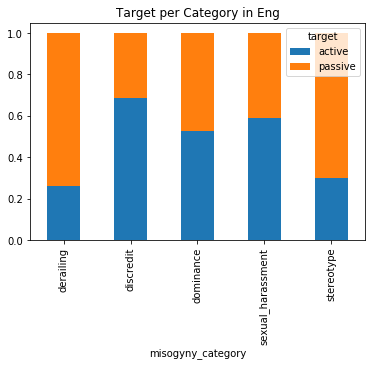

In [0]:
val_xt = pd.crosstab(enCategory['misogyny_category'], en['target'])
val_xt_pct = \
    val_xt.div(val_xt.sum(1).astype(float), axis=0)
val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Target per Category in Eng')

Text(0.5, 1.0, 'Target per Category in It')

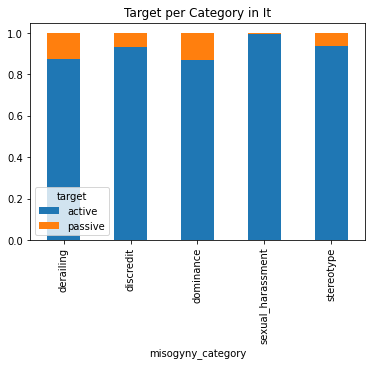

In [0]:
val_xt = pd.crosstab(itCategory['misogyny_category'], itTarget['target'])
val_xt_pct = \
    val_xt.div(val_xt.sum(1).astype(float), axis=0)
val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Target per Category in It')

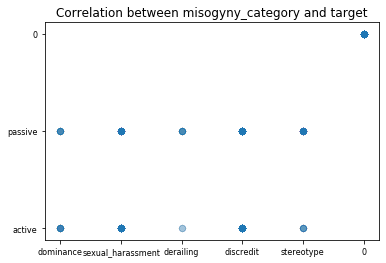

In [0]:
plt.scatter(en['misogyny_category'], en['target'], s=40, alpha = 0.02)
plt.title('Correlation between misogyny_category and target')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

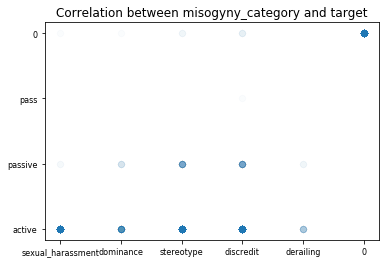

In [0]:
plt.scatter(it['misogyny_category'], it['target'], s=40, alpha = 0.02)
plt.title('Correlation between misogyny_category and target')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

## Linguistic Analysis

In [0]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

tweetTok = TweetTokenizer()
tweets = en["text"].apply((lambda x: tweetTok.tokenize(x)))
tweetsString = []
for tw in tweets:
  tweetsString += tw
  tweetsString += ", "

In [0]:
tweets

0       [Please, tell, me, why, the, bitch, next, to, ...
1       [@emmasharp003, @Ldrake48Lee, Bitch, shut, the...
2       [@abzdafab, Dear, cunt, ,, please, shut, the, ...
3       [RT, @queenofdragonsb, :, Pls, shut, the, fuck...
4       [RT, @21bIvck, :, ", when, u, gonna, get, your...
                              ...                        
3995    [FYI, ., Mariah, rhymes, with, Pariah, which, ...
3996    [Johnny, Castle, loves, always, wet, warm, fuc...
3997    [@DonCannon, @DJDRAMA, Ole, fat, neck, ass, ni...
3998    [Xd, @Idubbbz, tight, hole, lost, <3, Kids, @m...
3999    [@jonoread, @Davee8989, Fat, cunt, most, likel...
Name: text, Length: 4000, dtype: object

In [0]:
tweetsString

['Please',
 'tell',
 'me',
 'why',
 'the',
 'bitch',
 'next',
 'to',
 'me',
 'in',
 'the',
 'piercing',
 'line',
 'is',
 'so',
 'judgmental',
 'about',
 'everyone',
 'she',
 'fucking',
 'sees',
 '.',
 'SHUT',
 'THE',
 'FUCK',
 'UP',
 '.',
 ',',
 ' ',
 '@emmasharp003',
 '@Ldrake48Lee',
 'Bitch',
 'shut',
 'the',
 'fuck',
 'up',
 ',',
 ' ',
 '@abzdafab',
 'Dear',
 'cunt',
 ',',
 'please',
 'shut',
 'the',
 'fuck',
 'up',
 '.',
 ',',
 ' ',
 'RT',
 '@queenofdragonsb',
 ':',
 'Pls',
 'shut',
 'the',
 'fuck',
 'up',
 'bitch',
 ',',
 ' ',
 'RT',
 '@21bIvck',
 ':',
 '"',
 'when',
 'u',
 'gonna',
 'get',
 'your',
 'license',
 '"',
 'SHUT',
 'THE',
 'FUCK',
 'UP',
 'BITCH',
 'I',
 'AINT',
 'GOT',
 'TIME',
 'DAMN',
 'GET',
 'OFF',
 'MY',
 'DICK',
 ',',
 ' ',
 '@SarahhWaqar',
 '@CallmeJaagii',
 'Bitch',
 'shut',
 'the',
 'fuck',
 'up',
 ',',
 ' ',
 'ok',
 'babies',
 "i'll",
 'go',
 'to',
 'sleep',
 'ok',
 'bitch',
 'shut',
 'the',
 'fuck',
 'up',
 ',',
 ' ',
 'You',
 'are',
 'a',
 'fucking',
 'ugl

In [0]:
tweetTok = TweetTokenizer()
tweetsIt = it["text"].apply((lambda x: tweetTok.tokenize(x)))
tweetsStringIt = []
for tw in tweetsIt:
  tweetsStringIt += tw
  tweetsStringIt += ", "

In [0]:
tweetsIt

0       [@KassemAmin4, @Laylasexgdr, Fatti, trovare, t...
1       [@meb, Tu, dovresti, ricominciare, dai, semafo...
2       [Amore, ,, sei, presentabile, ?, Xchè, così, v...
3       [@Il_nulla, Salvo, poi, mandare, la, culona, a...
4       [@GiorgiaMeloni, @FratellidItaIia, Vediamo, Ge...
                              ...                        
3995    [Ho, ascoltato, tutto, il, giorno, Calcutta, e...
3996    [@, monsta, x, ma, vi, sbrigate, a, fa, una, p...
3997    [E, non, so, dove, studiare, perchè, casa, mia...
3998    [La, cazzata, è, stata, davvero, grande, ., In...
3999    [Per, un, corso, serale, sono, in, classe, con...
Name: text, Length: 4000, dtype: object

In [0]:
tweetsStringIt

['@KassemAmin4',
 '@Laylasexgdr',
 'Fatti',
 'trovare',
 'te',
 'lo',
 'do',
 'volentieri',
 'e',
 'ti',
 'sborro',
 'in',
 'bocca',
 ',',
 ' ',
 '@meb',
 'Tu',
 'dovresti',
 'ricominciare',
 'dai',
 'semafori',
 'a',
 'fare',
 'la',
 'lavavetri',
 '..',
 'ma',
 'tranquilla',
 'tanto',
 'il',
 'vitalizio',
 'ti',
 'resterà',
 'in',
 'gola',
 ',',
 ' ',
 'Amore',
 ',',
 'sei',
 'presentabile',
 '?',
 'Xchè',
 'così',
 'via',
 'Skype',
 'ti',
 'faccio',
 'conoscere',
 'i',
 'miei',
 'parenti',
 '...',
 '"',
 'e',
 'fu',
 'così',
 'che',
 'da',
 'un',
 'tablet',
 'ho',
 'conosciuto',
 'i',
 'parenti',
 'terroni',
 'della',
 'mia',
 'tettona',
 ',',
 'prendendomi',
 'un',
 '"',
 'avete',
 'già',
 'finito',
 'di',
 'pranzare',
 '?',
 'beh',
 'si',
 ',',
 'voi',
 'al',
 'nord',
 'siete',
 'diversi',
 '...',
 '"',
 'Dal',
 'nord',
 'è',
 'tutto',
 ',',
 'a',
 'voi',
 '...',
 '"',
 ',',
 ' ',
 '@Il_nulla',
 'Salvo',
 'poi',
 'mandare',
 'la',
 'culona',
 'a',
 'Mosca',
 ',',
 'aummaumm',
 ',',

### PoS

PoS Tagging

In [0]:
#nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for tweet in tweets:
  listPOS.append(nltk.pos_tag(tweet))
#listPOS[0][0][0]
#listPOS[0][0]
listPOS[0]

[('Please', 'NNP'),
 ('tell', 'VB'),
 ('me', 'PRP'),
 ('why', 'WRB'),
 ('the', 'DT'),
 ('bitch', 'NN'),
 ('next', 'IN'),
 ('to', 'TO'),
 ('me', 'PRP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('piercing', 'NN'),
 ('line', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('judgmental', 'JJ'),
 ('about', 'IN'),
 ('everyone', 'NN'),
 ('she', 'PRP'),
 ('fucking', 'VBG'),
 ('sees', 'NNS'),
 ('.', '.'),
 ('SHUT', 'VB'),
 ('THE', 'DT'),
 ('FUCK', 'NNP'),
 ('UP', 'NNP'),
 ('.', '.')]

In [0]:
dictPOS = {}
for tweet in listPOS: 
  dictPOS[tweet[0][0]] = tweet[0][1]
dictPOS

{'Please': 'NNP',
 '@emmasharp003': 'JJ',
 '@abzdafab': 'JJ',
 'RT': 'NNP',
 '@SarahhWaqar': 'JJ',
 'ok': 'NN',
 'You': 'PRP',
 '@AnisaJomha': 'NN',
 '@ArianasBotch': 'VB',
 '@LadyNadiaEssex': 'NN',
 'Selena': 'NNP',
 '@Sundae_3': 'NN',
 'like': 'IN',
 '@sofiasfaIcones': 'NNS',
 "Don't": 'NNP',
 'If': 'IN',
 'charli': 'NN',
 'Bitch': 'NNP',
 '@saima55016154': 'JJ',
 'Rica': 'NNP',
 'Say': 'NNP',
 '@thereallisaann': 'JJ',
 'They': 'PRP',
 'I': 'PRP',
 '@Davidsalas87': 'NN',
 'cuf': 'NN',
 '@ashitudeprobs': 'NNS',
 'And': 'CC',
 'also': 'RB',
 'Boo': 'NNP',
 '@CyV_SW': 'JJ',
 'Kashdoll': 'NNP',
 'Literally': 'RB',
 'But': 'CC',
 '@SlutMagn3t': 'JJ',
 'Is': 'VBZ',
 'Why': 'WRB',
 'So': 'RB',
 'my': 'PRP$',
 'All': 'PDT',
 "I'm": 'NNP',
 'Thats': 'NNS',
 '@sza': 'NN',
 '@lovelynicolee_': 'IN',
 '@susansubfatmum': 'NN',
 'ALSO': 'NNP',
 '🗣': 'NN',
 'Ill': 'NNP',
 'https://t.co/XjDnKjjfdU': 'NN',
 'First': 'NNP',
 'wow': 'NN',
 'Too': 'RB',
 '@Iovesyuno': 'NN',
 'oh': 'IN',
 'Me': 'NNP',
 '@

In [0]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Why', 'WRB'),
 ('why', 'WRB'),
 ('When', 'WRB'),
 ('How', 'WRB'),
 ('Whenever', 'WRB'),
 ('how', 'WRB'),
 ('when', 'WRB'),
 ('Where', 'WRB'),
 ('HOW', 'WRB'),
 ('what', 'WP'),
 ('What', 'WP'),
 ('Who', 'WP'),
 ('WHO', 'WP'),
 ('who', 'WP'),
 ('Whoever', 'WDT'),
 ('Snapchat', 'WDT'),
 ('Whatever', 'WDT'),
 ('Is', 'VBZ'),
 ('IS', 'VBZ'),
 ('Turns', 'VBZ'),
 ('Has', 'VBZ'),
 ('Says', 'VBZ'),
 ('Does', 'VBZ'),
 ('@tariqnasheed', 'VBN'),
 ('Asked', 'VBN'),
 ('Unprecedented', 'VBN'),
 ('@JustJared', 'VBN'),
 ('@mehulved', 'VBN'),
 ('Bored', 'VBN'),
 ('Retweeted', 'VBN'),
 ('@JenAshleyWright', 'VBN'),
 ('@asianwasted', 'VBN'),
 ('Deleted', 'VBN'),
 ('Headed', 'VBN'),
 ('found', 'VBN'),
 ('Made', 'VBN'),
 ('@JoshuaCallen', 'VBN'),
 ('Rated', 'VBN'),
 ('@Starrs_Missed', 'VBN'),
 ('Restrained', 'VBN')]

In [0]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOSIt = []
for tweet in tweetsIt:
  listPOSIt.append(nltk.pos_tag(tweet, lang="it"))
listPOSIt[0]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('@KassemAmin4', 'JJ'),
 ('@Laylasexgdr', 'NNP'),
 ('Fatti', 'NNP'),
 ('trovare', 'NN'),
 ('te', 'NN'),
 ('lo', 'NN'),
 ('do', 'VBP'),
 ('volentieri', 'NNS'),
 ('e', 'VB'),
 ('ti', 'NNS'),
 ('sborro', 'VB'),
 ('in', 'IN'),
 ('bocca', 'NN')]

In [0]:
dictPOSIt = {}
for tweet in listPOSIt: 
  dictPOSIt[tweet[0][0]] = tweet[0][1]
dictPOSIt

{'@KassemAmin4': 'JJ',
 '@meb': 'JJ',
 'Amore': 'RB',
 '@Il_nulla': 'NN',
 '@GiorgiaMeloni': 'JJ',
 '@alinefenaroly': 'JJ',
 '@Alex82564331': 'JJ',
 'Puttana': 'NNP',
 '@elheartmash': 'NN',
 'Finalmente': 'NNP',
 '@ValeSantaSubito': 'JJ',
 '@ficamiatop': 'JJ',
 'Mi': 'NNP',
 '@SailorNuzz': 'NN',
 '@pheiticeira': 'JJ',
 '@leone5264': 'JJ',
 'Comunque': 'NNP',
 '@sdeangelis56': 'JJ',
 '@marica_love23': 'JJ',
 'Zitta': 'NNP',
 '#Isola': 'NN',
 '@sexyforyou74': 'JJ',
 '@erisdelrey': 'JJ',
 'Tremenda': 'NNP',
 '@Melissa_Merz': 'JJ',
 '@DirtyElaine': 'NN',
 'mi': 'NN',
 '@Libero_official': 'JJ',
 'Non': 'NNP',
 'RT': 'NNP',
 '@SexyRamonaXXX': 'NN',
 'COME': 'NNP',
 '#Selvaggilucarelli': 'NN',
 '@cmswllng': 'JJ',
 'Qualsiasi': 'NNP',
 '@GILDA31395269': 'JJ',
 '@WeirdLifeHacks': 'NNS',
 '@sole24ore': 'RB',
 'Ti': 'NNP',
 'fIgA': 'NN',
 '@scopgdrx': 'JJ',
 '@riccionecp': 'JJ',
 '@LirosNoble': 'JJ',
 'Se': 'NNP',
 '@claranderson21': 'JJ',
 '@ciccicrokki': 'JJ',
 '@AliciaLaNena96': 'JJ',
 '@luino

In [0]:
from nltk import Counter
Counter(dictPOSIt).most_common(40)

[('@Sisonsen', 'VBN'),
 ('Retweeted', 'VBN'),
 ('@Joker__Reloaded', 'VBN'),
 ('@Amateurdogging', 'VBG'),
 ('@winteriscomving', 'VBG'),
 ('@Federic36011668', 'VB'),
 ('@MassimoInLove', 'VB'),
 ('@_GioGio_', 'VB'),
 ('@redazioneiene', 'VB'),
 ('@bubblekkam', 'VB'),
 ('allora', 'VB'),
 ('@BobbiaOdille', 'VB'),
 ('@patriziaandreoz', 'VB'),
 ('PUTTANONE', 'VB'),
 ('@SoloLibera', 'VB'),
 ('Poi', 'VB'),
 ('CONDANNARE', 'VB'),
 ('im', 'VB'),
 ('@ilfoolonthehill', 'VB'),
 ('@kylaalove', 'VB'),
 ('come', 'VB'),
 ('sempre', 'VB'),
 ('Vado', 'VB'),
 ('Continuo', 'VB'),
 ('@Bassman8256', 'VB'),
 ('dove', 'VB'),
 ('@zaynsbrave', 'VB'),
 ('@mauriziospaglia', 'VB'),
 ('@Ste9418', 'VB'),
 ('Prese', 'VB'),
 ('@ah_lisp', 'VB'),
 ('Throw', 'VB'),
 ('GRAZIE', 'VB'),
 ('Oh', 'UH'),
 ('oh', 'UH'),
 ('@sanadvbxx', 'SYM'),
 ('@gual89', 'SYM'),
 ('@La_Connie_', 'SYM'),
 ('@ZingaroIl', 'SYM'),
 ('Amore', 'RB')]

### Stem

Stemming 

In [0]:
for tok in filtered_sent:
  print(tok)

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmed = [stemmer.stem(tok) for tok in filtered_sent]
print(' '.join(stemmed))

pleas tell bitch next pierc line judgment everyon fuck see . shut the fuck UP . ,   @emmasharp003 @ldrake48le bitch shut fuck ,   @abzdafab dear cunt , pleas shut fuck . ,   RT @queenofdragonsb : pl shut fuck bitch ,   RT @21bivck : " u gonna get licens " shut the fuck UP bitch I aint got time damn get off MY dick ,   @sarahhwaqar @callmejaagii bitch shut fuck ,   ok babi i'll go sleep ok bitch shut fuck ,   you fuck ugli bitch ! shut fuck ? ? ? ugli bitch ! fuck ? ? ? ,   RT @bnixol : bitch shut fuck fuck best friend dad https://t.co/1yr6ydzmgc ,   RT @vaintshit : shut fuck come suck dick " ,   @anisajomha ice talent ejecul sperm ur whole bodi pleas shut fuck go suck idubbz dick u cunt ,   @arianasbotch Ok fuck said leav block . but dm first i'm gonna kick ass . shut fuck https://t.co/6bxkfxmef9 ,   @ladynadiaessex shut fuck ye littl slag ,   selena been act like she'ss victim year , shut fuck https://t.co/tawvofipgj ,   @sundae_3 shut fuck cunt ,   like damn bitch your hungri shut fu

In [0]:
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("italian")
stemmedIt = [stemmer.stem(tok) for tok in filtered_sentIt]
print(' '.join(stemmedIt))

@kassemamin4 @laylasexgdr fatt trov te do volentier sborr bocc ,   @meb tu dovrest ricominc semafor far lavavetr .. tranquill tant vitaliz rest gol ,   amor , present ? xchè cos via skype conosc parent ... " cos tablet conosc parent terron tetton , prend " già fin pranz ? beh , nord div ... " dal nord , ... " ,   @il_null salv poi mand culon mosc , aummaumm , fars dar putin commess multimiliardar mett quel post fratell ue ( qual noi ) ,   @giorgiamelon @fratelliditai ved gentilon , ora fin esser servil ! pens dann franc fatt sarkosy culon merkel bombard lib ,   @alinefenaroly che cagn anke vogl far pasqu cos te mmmmmm ,   @alex82564331 bell fig scop ,   puttan — cazz sai smett https://t.co/bnpkowxxq0 ,   @elheartmash ti incul https://t.co/bs92zwoyr5 ,   final nuov polpetton culon coccodrill ❤ . https://t.co/hhvijysilc ,   @valesantasub puttanon ,   @ficamiatop ti scop fig ,   mi piac vide @youtub : https://t.co/hqmb5qnen1 20 mot per uscir con una tetton ,   @sailornuzz ah tetton ,   @p

### FreqDist Eng

In [0]:
from nltk.probability import FreqDist

fdist = FreqDist(tweetsString)
print(fdist)

<FreqDist with 12351 samples and 85002 outcomes>


In [0]:
fdist.most_common(20) # da eliminare le stop words

[(',', 5227),
 (' ', 4000),
 ('you', 1995),
 ('a', 1924),
 ('.', 1898),
 ('the', 1338),
 ('to', 1293),
 ('I', 1060),
 ('and', 991),
 ("'", 816),
 ('bitch', 779),
 ('is', 676),
 ('of', 676),
 ('!', 653),
 ('that', 605),
 ('?', 594),
 ('your', 587),
 ('are', 576),
 ('women', 567),
 ('in', 561)]

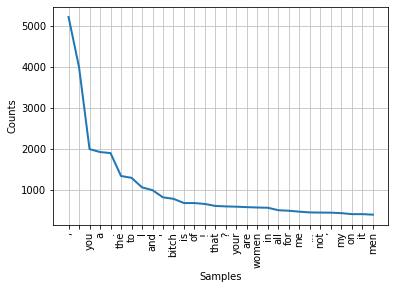

In [0]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [0]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"needn't", 'should', 'a', 'which', 'most', 'shouldn', 'now', 'ours', 'over', 'by', 'were', "weren't", 'above', 'here', 'or', ':', 'am', 'hasn', 'll', "'", 'his', 'these', 'into', "you'll", "mightn't", 'those', 'because', 'very', 'has', 'hadn', ',', 'as', 'been', '…', 'down', 't', 'the', "doesn't", 'doesn', 'her', 'my', 'i', "she's", 'until', 'in', 'other', 'then', 'same', 'ma', "you're", 'how', '...', "you'd", 'with', 'why', 'your', 'couldn', 'there', 'own', 'me', 'that', "hadn't", 'don', "won't", 'herself', 've', "haven't", 'further', '’', 'out', 'their', 'each', 'is', 'nor', 'myself', 'can', 'what', 'again', 'yours', 'it', 'have', 'if', 'where', 'won', 'while', 'wouldn', 'yourself', 'are', 'was', '-', 'had', 'y', 'at', 'when', "didn't", "shouldn't", 'more', 'did', 'isn', 'to', 'but', 'will', 're', 's', 'any', 'mustn', '.', 'doing', 'from', 'itself', 'about', 'shan',

In [0]:
filtered_sent=[]
for w in tweetsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",tweetsString)
print("Filtered Sentence:",filtered_sent)

Tokenized Sentence: ['Please', 'tell', 'me', 'why', 'the', 'bitch', 'next', 'to', 'me', 'in', 'the', 'piercing', 'line', 'is', 'so', 'judgmental', 'about', 'everyone', 'she', 'fucking', 'sees', '.', 'SHUT', 'THE', 'FUCK', 'UP', '.', ',', ' ', '@emmasharp003', '@Ldrake48Lee', 'Bitch', 'shut', 'the', 'fuck', 'up', ',', ' ', '@abzdafab', 'Dear', 'cunt', ',', 'please', 'shut', 'the', 'fuck', 'up', '.', ',', ' ', 'RT', '@queenofdragonsb', ':', 'Pls', 'shut', 'the', 'fuck', 'up', 'bitch', ',', ' ', 'RT', '@21bIvck', ':', '"', 'when', 'u', 'gonna', 'get', 'your', 'license', '"', 'SHUT', 'THE', 'FUCK', 'UP', 'BITCH', 'I', 'AINT', 'GOT', 'TIME', 'DAMN', 'GET', 'OFF', 'MY', 'DICK', ',', ' ', '@SarahhWaqar', '@CallmeJaagii', 'Bitch', 'shut', 'the', 'fuck', 'up', ',', ' ', 'ok', 'babies', "i'll", 'go', 'to', 'sleep', 'ok', 'bitch', 'shut', 'the', 'fuck', 'up', ',', ' ', 'You', 'are', 'a', 'fucking', 'ugly', 'bitch', '!', 'shut', 'the', 'fuck', 'up', '?', '?', '?', 'you', 'just', 'a', 'ugly', 'bitc

In [0]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 12176 samples and 48993 outcomes>


In [0]:
fdistNoStop.most_common(20)

[(' ', 4000),
 ('I', 1060),
 ('bitch', 779),
 ('women', 567),
 ('men', 392),
 ('like', 376),
 ('cunt', 357),
 ('When', 316),
 ('whore', 305),
 ('rape', 281),
 ('woman', 274),
 ('You', 248),
 ('get', 236),
 ('ass', 225),
 ('hoe', 217),
 ('😂', 216),
 ('dick', 193),
 ('fuck', 192),
 ('stupid', 192),
 ('know', 186)]

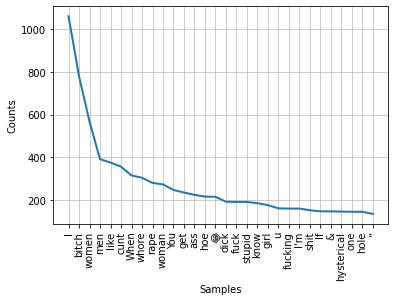

In [0]:
import matplotlib.pyplot as plt
fdistNoStop.plot(30,cumulative=False)
plt.show()

### FreqDist It

In [0]:
from nltk.probability import FreqDist

fdistIt = FreqDist(tweetsStringIt)
print(fdistIt)

<FreqDist with 16532 samples and 91004 outcomes>


In [0]:
fdistIt.most_common(20) # da eliminare le stop words

[(',', 5969),
 (' ', 4000),
 ('che', 1983),
 ('?', 1664),
 ('di', 1603),
 ('.', 1401),
 ('e', 1345),
 ('!', 1213),
 ('puttana', 1207),
 ('la', 1081),
 ('a', 938),
 ('non', 909),
 ('porca', 906),
 ('il', 710),
 ('è', 692),
 ('un', 648),
 ('una', 638),
 ('...', 631),
 ('cazzo', 595),
 ('ma', 588)]

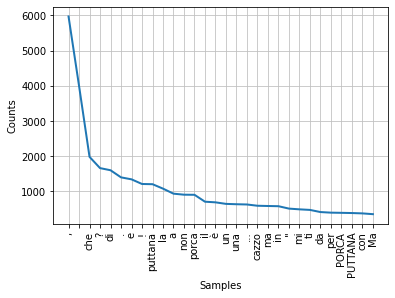

In [0]:
import matplotlib.pyplot as plt
fdistIt.plot(30,cumulative=False)
plt.show()

In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWordsIt = set(stopwords.words('italian'))
for x in punkt:
  stopWordsIt.add(x)
print(stopWordsIt)

{'facciano', 'fummo', 'ne', 'sui', 'la', 'a', 'avemmo', 'faccio', 'siano', 'avrebbero', 'col', 'vostri', 'fosti', 'fareste', 'facevate', 'sugli', 'fanno', 'ebbero', 'stesti', 'sugl', 'io', 'avranno', 'le', 'tuoi', 'una', 'e', 'facevano', 'stavate', 'mio', 'stavano', 'abbiate', 'con', 'faremmo', 'sarà', 'nelle', 'quale', 'del', 'avessero', 'un', 'quanti', 'avendo', 'dai', 'agli', "'", 'siete', 'stai', 'vi', 'stavo', ',', 'nello', 'faremo', 'facesti', 'nel', 'nostri', 'eri', 'nostro', 'avrete', '…', 'stavi', 'dove', 'questo', 'fecero', 'cui', 'i', 'in', 'non', 'loro', 'farà', 'sarebbero', 'tu', 'steste', 'tue', 'sia', 'mia', 'ti', 'sto', 'sareste', 'ma', 'ebbi', 'della', 'nella', 'sul', 'avessi', 'aveste', 'staremo', '...', 'sullo', 'farai', 'furono', 'stetti', 'stareste', 'fosse', 'mi', 'sarete', 'allo', 'facessero', 'ad', 'ha', 'sono', 'avevamo', 'avevate', 'stavamo', 'come', 'sue', 'dal', 'ed', '’', 'quante', 'stemmo', 'staranno', 'avremmo', 'avevi', 'stessimo', 'facevo', 'abbiamo', '

In [0]:
filtered_sentIt=[]
for w in tweetsStringIt:
    if w not in stopWordsIt:
        filtered_sentIt.append(w)
print("Tokenized Sentence:",tweetsStringIt)
print("Filtered Sentence:",filtered_sentIt)

Tokenized Sentence: ['@KassemAmin4', '@Laylasexgdr', 'Fatti', 'trovare', 'te', 'lo', 'do', 'volentieri', 'e', 'ti', 'sborro', 'in', 'bocca', ',', ' ', '@meb', 'Tu', 'dovresti', 'ricominciare', 'dai', 'semafori', 'a', 'fare', 'la', 'lavavetri', '..', 'ma', 'tranquilla', 'tanto', 'il', 'vitalizio', 'ti', 'resterà', 'in', 'gola', ',', ' ', 'Amore', ',', 'sei', 'presentabile', '?', 'Xchè', 'così', 'via', 'Skype', 'ti', 'faccio', 'conoscere', 'i', 'miei', 'parenti', '...', '"', 'e', 'fu', 'così', 'che', 'da', 'un', 'tablet', 'ho', 'conosciuto', 'i', 'parenti', 'terroni', 'della', 'mia', 'tettona', ',', 'prendendomi', 'un', '"', 'avete', 'già', 'finito', 'di', 'pranzare', '?', 'beh', 'si', ',', 'voi', 'al', 'nord', 'siete', 'diversi', '...', '"', 'Dal', 'nord', 'è', 'tutto', ',', 'a', 'voi', '...', '"', ',', ' ', '@Il_nulla', 'Salvo', 'poi', 'mandare', 'la', 'culona', 'a', 'Mosca', ',', 'aummaumm', ',', 'per', 'farsi', 'dare', 'da', 'Putin', 'commesse', 'multimiliardarie', 'e', 'metterlo', '

In [0]:
fdistNoStopIt = FreqDist(filtered_sentIt)
print(fdistNoStopIt)

<FreqDist with 16304 samples and 54987 outcomes>


In [0]:
fdistNoStopIt.most_common(20)

[(' ', 4000),
 ('puttana', 1207),
 ('porca', 906),
 ('cazzo', 595),
 ('PORCA', 394),
 ('PUTTANA', 388),
 ('Ma', 356),
 ('troia', 339),
 ('figa', 288),
 ('Porca', 282),
 ('E', 281),
 ('tettona', 267),
 ('culona', 262),
 ('CHE', 249),
 ('Che', 209),
 ('A', 182),
 ('me', 181),
 ('DI', 175),
 ('MA', 170),
 ('CAZZO', 167)]

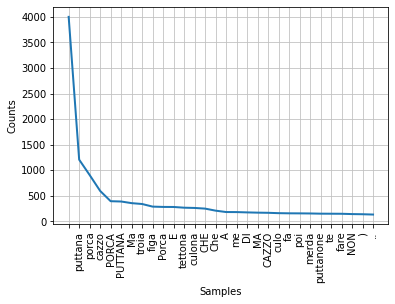

In [0]:
import matplotlib.pyplot as plt
fdistNoStopIt.plot(30,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [0]:
pip install wordcloud

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

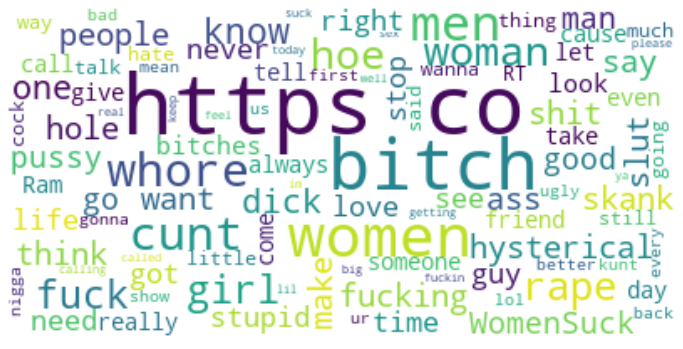

In [0]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

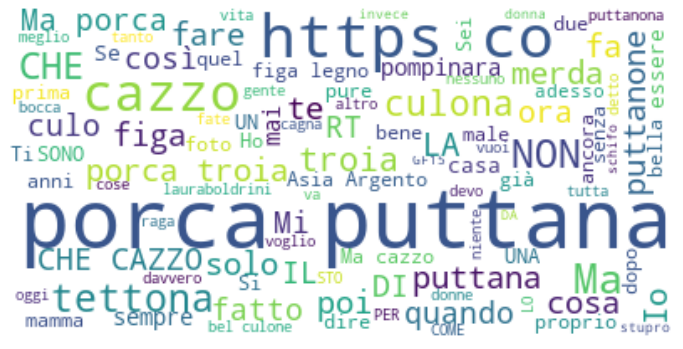

In [0]:
textWordCloudIt = ""
for x in filtered_sentIt:
  textWordCloudIt+=x+" "

wordcloudIt = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloudIt)
plt.figure(figsize=(12,16))
plt.imshow(wordcloudIt, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag Eng

How many hashtags?

In [0]:
count = 0
hashtags = []
for x in tweets:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

706
['#soundcloud', '#np', '#womenboycotttwitter', '#weinsteingate', '#findom', '#walletdrain', '#paypig', '#qotd', '#horror', '#firstofall', '#svt_project_vocal', '#pinwheel', '#wtf', '#cunt', '#womensuck', '#draft', '#womenareevil', '#evilwomen', '#womencantmakeburritos', '#sheforgottheguacamole', '#badburri', '#theredpill', '#', '#womenaredumb', '#triggered', '#idiots', '#shutthehellupwomen', '#ihatefemales', '#ilovefood', '#homecookedm', '#', '#mra', '#', '#100', '#babymomma', '#meetoo', '#marr', '#findom', '#lockherup', '#maledominance', '#maledomination', '#truth', '#didyouknow', '#maledominance', '#maledominance', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#yesallmen', '#teenwolf', '#menstruafacts', '#feminist', '#womenagainstfeminism', '#somebodytotris', '#menshealth', '#feminists', '#feminism', '#women', '#men', '#obviouschild', '#maledominance', '#yesallwomenbelonginthekitchen', '#yesallwomen'

In [0]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(10)

399


[('#womensuck', 123),
 ('#yesallmen', 29),
 ('#notallmen', 25),
 ('#metoo', 22),
 ('#maledominance', 19),
 ('#', 13),
 ('#whore', 7),
 ('#rape', 7),
 ('#women', 6),
 ('#feminismiscancer', 6)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [0]:
import re
#nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

['Sound Cloud',
 'n p',
 'Wo men Boycott Twitter',
 'we in steG ate',
 'Find om',
 'wallet drain',
 'pay pig',
 'Q O T D',
 'Horror',
 'First of All',
 'S V T _PROJEC_OCAL',
 'PIN WHEEL',
 'w t f',
 'c un t',
 'Wo men Suck',
 'draft',
 'wo men are evil',
 'evil wo men',
 'wo men cant make burrito s',
 'she forgot the g u a c mole',
 'bad burr i',
 'TheRe d Pill',
 '#',
 'wo men ared um b',
 'triggered',
 'idiot s',
 'shut the hell up wo men',
 'i hate female s',
 'i love food',
 'home cook e d m',
 'M RA',
 '100',
 'baby mo m a',
 'meet o',
 'mar r',
 'find om',
 'Lock Her Up',
 'Male Dominance',
 'Male Domination',
 'Truth',
 'did you know',
 'male dominance',
 'Yes All Men',
 'yes all men',
 'Teen Wolf',
 'men st r u a f c t s',
 'feminist',
 'Wo men Against Feminism',
 'Somebody ToT r is',
 'Men sHeal th',
 'feminist s',
 'feminism',
 'Wo men',
 'Men',
 'Obvious Child',
 'Yes All Wo men Belong In The Kitchen',
 'Yes All Wo men',
 'c y ber bull ie d',
 'THEB I G DUMP',
 'dont he con'

### Hashtag It

How many hashtags?

In [0]:
countIt = 0
hashtagsIt = []
for x in tweetsIt:
  for token in x:
    if '#' in token:
        countIt+=1
        hashtagsIt.append(token.lower())
print(countIt)
print(hashtagsIt)

792
['#isola', '#selvaggilucarelli', '#raoulbova', '#selvaggialucarelli', '#upas', '#emigratis', '#selvaggialucarelli', '#isola', '#pd', '#upas', '#culona', '#piccolieobesi', '#radio105', '#primoappuntamento', '#sopravvivereadatacmerda', '#lariachetira', '#uominiedonne', '#isola', '#tette', '#annatatangelo', '#masterchefit', '#limonayeappreciationday', '#fratellidicrozza', '#cosìèlavita', '#cosìèlavita', '#omnibusla7', '#casasalvini', '#orgogliodiserva', '#salvini', '#arredamentodaincubo', '#erdoğan', '#erdogan', '#siria', '#salvini', '#isoardi', '#amici', '#amici17', '#amici17', '#amici17', '#raccontoerotico', '#omnibusla7', "#wl'italia", '#omnibusla7', '#culona', '#formaggio', '#parmigiano', '#schifezze', '#gameofthrones', '#domenicalive', '#racconti', '#erotici', '#racconti', '#erotici', '#chilhavisto', '#primoappuntamento', '#chilhavisto', '#puttanona', '#dubbiesistenziali', '#chilhavisto', '#ucl', '#realjuve', '#uominiedonne', '#pomeriggio5perché', '#nickiday', '#merkel', '#cloro'

In [0]:
fdistHashTagsIt = FreqDist(hashtagsIt)
print(len(fdistHashTagsIt))
fdistHashTagsIt.most_common(10)

422


[('#gf15', 46),
 ('#amici17', 40),
 ('#isola', 19),
 ('#milan', 14),
 ('#uominiedonne', 13),
 ('#juvereal', 11),
 ('#torinointer', 11),
 ('#chilhavisto', 9),
 ('#realmadridjuve', 9),
 ('#realjuve', 8)]

### Retweets

How many retweets?

In [0]:
count = 0
ret = []
for x in tweets:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

1964
['@emmasharp003', '@Ldrake48Lee', '@abzdafab', '@queenofdragonsb', '@21bIvck', '@SarahhWaqar', '@CallmeJaagii', '@bnixole', '@vaintshit', '@AnisaJomha', '@ArianasBotch', '@LadyNadiaEssex', '@Sundae_3', '@Akhdre_', '@sofiasfaIcones', '@saima55016154', '@thereallisaann', '@Davidsalas87', '@ashitudeprobs', '@CyV_SW', '@SlutMagn3t', '@sza', '@lovelynicolee_', '@susansubfatmum', '@Iovesyuno', '@itschasex', '@beneathBlackMen', '@LisaBloom', '@Tuckedofftae', '@tariqnasheed', '@duastrouble', '@jacobsartorius', '@commentiquette', '@cher', '@AngelDemond4', '@westandian', '@xitsmaaarielx', '@', '@itsfordkath', '@SarahKSilverman', '@spoillbrat', '@ScarlettsGone', '@nypost', '@PrisonPlanet', '@connorfranta', '@DddNoel', '@spillaristea', '@xxxfurrygirl', '@AlwaysBeAPet101', '@KirkoBrooklyn', '@asialbx', '@HillaryClinton', '@MrRichardPowell', '@CrazyKOs', '@CrushingClipss', '@Tbagshitpants', '@PressStartKofi', '@sassybarbara12', '@SheriffClarke', '@FoxNews', '@FoxBusiness', '@BreitbartNews', '@S

In [0]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[('@realDonaldTrump', 44),
 ('@', 20),
 ('@Scouse_ma', 14),
 ('@HillaryClinton', 11),
 ('@FoxNews', 11),
 ('@themeredith', 10),
 ('@Yourfuckboy1', 9),
 ('@queensoverbitch', 9),
 ('@RepWilson', 9),
 ('@femfreq', 8)]

In [0]:
countIt = 0
retIt = []
for x in tweetsIt:
  for token in x:
    if '@' in token:
        countIt+=1
        retIt.append(token)
print(countIt)
print(retIt)

3611
['@KassemAmin4', '@Laylasexgdr', '@meb', '@Il_nulla', '@GiorgiaMeloni', '@FratellidItaIia', '@alinefenaroly', '@Alex82564331', '@elheartmash', '@ValeSantaSubito', '@ficamiatop', '@YouTube', '@SailorNuzz', '@pheiticeira', '@SailorNuzz', '@leone5264', '@TwittGiorgio', '@ilgiornale', '@sdeangelis56', '@marica_love23', '@MattleyR', '@sexyforyou74', '@erisdelrey', '@Esposos33', '@Melissa_Merz', '@meb', '@DirtyElaine', '@Libero_official', '@loveyinseok', '@agustdoIl', '@SexyRamonaXXX', '@Martatoia_va', '@YouTube', '@cmswllng', '@erika_battiston', '@meb', '@stanzaselvaggia', '@Ballando_Rai', '@GILDA31395269', '@GILDA31395269', '@WeirdLifeHacks', '@ChemistryVids_', '@sole24ore', '@carlottaventura', '@MarcoPatuano', '@poliziadistato', '@scopgdrx', '@riccionecp', '@LirosNoble', '@EdwardRedfern', '@claranderson21', '@paulaharrys19', '@solewinter', '@ciccicrokki', '@AliciaLaNena96', '@luinonsospetta', '@carla_milf', '@luinonsospetta', '@kathOsceansgdr', '@Gianlus990', '@meb', '@pisquini69', '

In [0]:
fdistRetIt = FreqDist(retIt)
fdistRetIt.most_common(10)

[('@AsiaArgento', 92),
 ('@lauraboldrini', 85),
 ('@Giuliettaxxx84', 46),
 ('@matteosalvinimi', 45),
 ('@stanzaselvaggia', 39),
 ('@GILDA31395269', 32),
 ('@meb', 21),
 ('@1111scihl', 20),
 ('@tuttotuo63', 20),
 ('@', 15)]

# Preprocessing: embeddings through BERT (English dataset) 

## BERT Tokenizer (Eng dataset) 

In [0]:
!pip install transformers

     |████████████████████████████████| 552kB 3.5MB/s 
     |████████████████████████████████| 870kB 48.9MB/s 
     |████████████████████████████████| 1.0MB 35.9MB/s 
     |████████████████████████████████| 3.7MB 40.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=53f6e32ef200c321eff553980b2f85c12b9a0dd43607bb610871c7619979a7b4
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
import transformers as tfs

In [0]:
model_class, tokenizer_class, pretrained_weights = (tfs.BertModel, tfs.BertTokenizer, 'bert-base-uncased')

# caricamento del tokenizer e del pretrained model
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
tokenized_sequence_BERT = en["text"].apply((lambda x: tokenizer.tokenize(x)))

In [0]:
tokenized_sequence_BERT

0       [please, tell, me, why, the, bitch, next, to, ...
1       [@, emma, ##sha, ##rp, ##00, ##3, @, ld, ##rak...
2       [@, ab, ##zd, ##af, ##ab, dear, cu, ##nt, ,, p...
3       [rt, @, queen, ##of, ##dra, ##gon, ##sb, :, pl...
4       [rt, @, 21, ##bi, ##vc, ##k, :, ", when, u, go...
                              ...                        
3995    [f, ##yi, ., maria, ##h, rhymes, with, par, ##...
3996    [johnny, castle, loves, always, wet, warm, fuc...
3997    [@, don, ##can, ##non, @, dj, ##dra, ##ma, ole...
3998    [x, ##d, @, id, ##ub, ##bb, ##z, tight, hole, ...
3999    [@, jon, ##ore, ##ad, @, dave, ##e, ##8, ##9, ...
Name: text, Length: 4000, dtype: object

In [0]:
# tokenizzazione con tokenizer di BERT
tokenized = en["text"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [0]:
tokenized

0       [101, 3531, 2425, 2033, 2339, 1996, 7743, 2279...
1       [101, 1030, 5616, 7377, 14536, 8889, 2509, 103...
2       [101, 1030, 11113, 26494, 10354, 7875, 6203, 1...
3       [101, 19387, 1030, 3035, 11253, 7265, 7446, 19...
4       [101, 19387, 1030, 2538, 5638, 25465, 2243, 10...
                              ...                        
3995    [101, 1042, 10139, 1012, 3814, 2232, 24468, 20...
3996    [101, 5206, 3317, 7459, 2467, 4954, 4010, 6616...
3997    [101, 1030, 2123, 9336, 8540, 1030, 6520, 7265...
3998    [101, 1060, 2094, 1030, 8909, 12083, 10322, 24...
3999    [101, 1030, 6285, 5686, 4215, 1030, 4913, 2063...
Name: text, Length: 4000, dtype: object

In [0]:
# individuare la lunghezza del token piu' lungo 
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
# padding ovvero rendere tutti i token della stessa lunghezza aggiungengo 0 finali
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [0]:
# utilizzo dell'attention_mask
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(4000, 85)

In [0]:
import torch
# padding come input al tensore
input_ids = torch.tensor(padded)  
# applicazione dell'attention_mask
attention_mask = torch.tensor(attention_mask)

In [0]:
# computazione dei token
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [0]:
# libreria pickle per salvare file generici di tipo obj o dat 
import pickle
PIK = "states.dat"

In [0]:
# scrittura di last_hidden_states nel file states.dat, in modo da poterlo recuperare per le prossimi run 
with open(directory+"/"+PIK, "wb") as f:
  pickle.dump(last_hidden_states, f)

In [0]:
# recupero del file .dat, contenente il risultato della computazione in last_hidden_states 
with open(directory+"/"+PIK, "rb") as f:
  enBERTTokenizer = pickle.load(f)

In [0]:
enBERTTokenizer

(tensor([[[ 0.2645,  0.2867, -0.1275,  ..., -0.2403,  0.0741,  0.4904],
          [ 0.0070,  0.6472, -0.0932,  ...,  0.3534,  0.2253,  0.8445],
          [ 0.6380,  0.4552,  0.8797,  ...,  0.4348, -0.3609,  0.2823],
          ...,
          [-0.0210, -0.0175,  0.4041,  ...,  0.2788,  0.2186,  0.1842],
          [-0.3315,  0.1717, -0.0547,  ...,  0.3341, -0.4758, -0.2814],
          [-0.1361,  0.5797,  0.4895,  ...,  0.1716, -0.4379,  0.6747]],
 
         [[ 0.0454,  0.3168,  0.1012,  ..., -0.4612,  0.0744,  0.1833],
          [ 1.0448,  0.5872,  0.3758,  ..., -0.1934,  0.2161,  0.1822],
          [ 0.2100,  0.4264,  0.2319,  ..., -0.7941, -0.2914,  0.1130],
          ...,
          [-0.2056,  0.0131,  0.5098,  ..., -0.3325, -0.0729, -0.0790],
          [-0.1270,  0.0579,  0.3977,  ..., -0.2382, -0.0873, -0.1399],
          [ 0.0653,  0.0556,  0.5087,  ..., -0.3309, -0.1039, -0.0497]],
 
         [[ 0.1029,  0.3806,  0.2925,  ..., -0.8662,  0.2277,  0.6857],
          [ 0.8315,  1.2492,

In [0]:
# creazione var features
features = enBERTTokenizer[0][:,0,:].numpy()

In [0]:
features

array([[ 0.26451057,  0.28670362, -0.12746693, ..., -0.24033359,
         0.07414922,  0.4904387 ],
       [ 0.0454451 ,  0.31676266,  0.10117254, ..., -0.46119666,
         0.07435245,  0.18326193],
       [ 0.10289983,  0.38059676,  0.29254892, ..., -0.8662192 ,
         0.22773904,  0.68570936],
       ...,
       [ 0.37046954,  0.30642253,  0.29225653, ..., -0.5084799 ,
         0.04815133,  0.33291274],
       [-0.08487867,  0.05665248, -0.04688576, ..., -0.24600156,
         0.17060314,  0.39451465],
       [ 0.18507116,  0.3286848 ,  0.1403675 , ..., -0.2321976 ,
         0.32374758,  0.41094604]], dtype=float32)

## TweetTokenizer from NTLK (English dataset)

In [0]:
from nltk.tokenize import TweetTokenizer

In [0]:
model_class, tokenizer_class, pretrained_weights = (tfs.BertModel, tfs.BertTokenizer, 'bert-base-uncased')

# caricamento del tokenizer e del pretrained model
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
tweetTok = TweetTokenizer()
tweets = en["text"].apply((lambda x: tweetTok.tokenize(x)))
tokenizedTweet = tweets.apply((lambda x: tokenizer.convert_tokens_to_ids(x)))

In [0]:
tokenizedTweet

0       [100, 2425, 2033, 2339, 1996, 7743, 2279, 2000...
1                 [100, 100, 100, 3844, 1996, 6616, 2039]
2       [100, 100, 100, 1010, 3531, 3844, 1996, 6616, ...
3       [100, 100, 1024, 100, 3844, 1996, 6616, 2039, ...
4       [100, 100, 1024, 1000, 2043, 1057, 6069, 2131,...
                              ...                        
3995    [100, 1012, 100, 24468, 2007, 100, 2029, 1999,...
3996    [100, 100, 7459, 2467, 4954, 4010, 6616, 4920,...
3997    [100, 100, 100, 6638, 3300, 4632, 100, 1012, 1...
3998    [100, 100, 4389, 4920, 2439, 100, 100, 100, 79...
3999    [100, 100, 100, 100, 2087, 3497, 2081, 1996, 4...
Name: text, Length: 4000, dtype: object

In [0]:
# individuare la lunghezza del token piu' lungo 
max_len = 0
for i in tokenizedTweet.values:
    if len(i) > max_len:
        max_len = len(i)
# padding ovvero rendere tutti i token della stessa lunghezza aggiungengo 0 finali
paddedTweet = np.array([i + [0]*(max_len-len(i)) for i in tokenizedTweet.values])

In [0]:
# utilizzo dell'attention_mask
attention_mask = np.where(paddedTweet != 0, 1, 0)
attention_mask.shape

(4000, 44)

In [0]:
import torch
# padding come input al tensore
input_ids_tweet = torch.tensor(paddedTweet)  
# applicazione dell'attention_mask
attention_mask = torch.tensor(attention_mask)

In [0]:
# computazione dei token
with torch.no_grad():
    last_hidden_states_tweet = model(input_ids_tweet, attention_mask=attention_mask)

In [0]:
# libreria pickle per salvare file generici di tipo obj o dat 
import pickle
tweetsEngTokenized = "tweetsEngTokenized.dat"

In [0]:
# scrittura di last_hidden_states nel file states.dat, in modo da poterlo recuperare per le prossimi run 
with open(directory+"/"+tweetsEngTokenized, "wb") as f:
  pickle.dump(last_hidden_states_tweet, f)

In [0]:
# recupero del file .dat, contenente il risultato della computazione in last_hidden_states 
with open(directory+"/"+tweetsEngTokenized, "rb") as f:
  enTweetsTokenized = pickle.load(f)

In [0]:
enTweetsTokenized

(tensor([[[ 0.6669, -0.1825, -0.0786,  ..., -0.7727,  0.4773,  0.1903],
          [ 0.7702,  0.2187,  0.2994,  ..., -0.1218,  0.5295,  0.2495],
          [ 0.2483,  0.2338,  0.0707,  ..., -0.1034,  0.4136,  0.4175],
          ...,
          [ 0.5299,  0.2284,  0.0673,  ..., -0.2950,  0.6264,  0.8056],
          [ 0.2420,  0.3785,  0.0223,  ..., -0.2118,  0.5722,  0.9341],
          [ 0.3145,  0.4600,  0.0405,  ..., -0.3125,  0.5010,  0.7758]],
 
         [[-0.2973,  0.3498, -0.7325,  ..., -0.4006,  0.3075, -0.2032],
          [-0.0338,  0.6771, -0.6369,  ..., -0.1913,  0.4260, -0.2678],
          [-0.0389,  0.6485, -0.5478,  ..., -0.2816,  0.2428, -0.2265],
          ...,
          [-0.4101,  0.3559, -0.7046,  ..., -0.3529,  0.2279, -0.2368],
          [-0.4332,  0.3554, -0.6758,  ..., -0.3589,  0.2192, -0.2678],
          [-0.4429,  0.3432, -0.6626,  ..., -0.3668,  0.2090, -0.2670]],
 
         [[-0.1948,  0.2438, -0.5204,  ..., -0.4028,  0.8226,  0.2908],
          [-0.2562,  0.4821,

In [0]:
# creazione var features
featuresEnTweets = enTweetsTokenized[0][:,0,:].numpy()

In [0]:
featuresEnTweets

array([[ 0.66687715, -0.18250573, -0.07861654, ..., -0.77269244,
         0.4773389 ,  0.19033715],
       [-0.29729387,  0.34977657, -0.7324961 , ..., -0.4006428 ,
         0.30749175, -0.20315832],
       [-0.19484632,  0.24383323, -0.5204271 , ..., -0.40276107,
         0.8226346 ,  0.29078403],
       ...,
       [ 0.2790977 ,  0.09410761, -0.14045858, ..., -0.19950822,
         0.21733652,  0.3290443 ],
       [-0.01664938,  0.17103775, -0.27468243, ..., -0.3866124 ,
         0.08678921,  0.06118516],
       [ 0.00890136,  0.12639186, -0.18333462, ..., -0.34723657,
         0.00236756, -0.03723012]], dtype=float32)

## Custom tokenization (English dataset)

From

1.   https://datascienceplus.com/twitter-analysis-with-python/
2.   http://blog.chapagain.com.np/python-nltk-twitter-sentiment-analysis-natural-language-processing-nlp/
3. https://stackabuse.com/text-classification-with-bert-tokenizer-and-tf-2-0-in-python/



In [0]:
from nltk.tokenize import TweetTokenizer

In [0]:
en["text"]

0       Please tell me why the bitch next to me in the...
1       @emmasharp003 @Ldrake48Lee Bitch shut the fuck up
2           @abzdafab Dear cunt, please shut the fuck up.
3         RT @queenofdragonsb: Pls shut the fuck up bitch
4       RT @21bIvck: "when u gonna get your license" S...
                              ...                        
3995    FYI. Mariah rhymes with Pariah which in German...
3996    Johnny Castle loves always wet warm fuck hole ...
3997    @DonCannon @DJDRAMA Ole fat neck ass nigha . R...
3998    Xd @Idubbbz tight hole lost <3 Kids @metpolice...
3999    @jonoread @Davee8989 Fat cunt most likely made...
Name: text, Length: 4000, dtype: object

In [0]:
import re
raw = en["text"]
tweetsCleaning = raw.apply((lambda x: x.lower()))
tweetsCleaning = tweetsCleaning.apply(lambda x: re.sub('[!@$:).;,?&]', '', x))
tweetsCleaning = tweetsCleaning.apply(lambda x: re.sub('  ', ' ', x))
tweetsCleaning = tweetsCleaning.apply(lambda x: re.sub(r'^RT[\s]+', '', x))
tweetsCleaning = tweetsCleaning.apply(lambda x: re.sub(r'^rt[\s]+', '', x))
tweetsCleaning = tweetsCleaning.apply(lambda x: re.sub(r'http\S+', '', x))
tweetsCleaning

0       please tell me why the bitch next to me in the...
1         emmasharp003 ldrake48lee bitch shut the fuck up
2              abzdafab dear cunt please shut the fuck up
3              queenofdragonsb pls shut the fuck up bitch
4       21bivck "when u gonna get your license" shut t...
                              ...                        
3995    fyi mariah rhymes with pariah which in german ...
3996    johnny castle loves always wet warm fuck hole ...
3997    doncannon djdrama ole fat neck ass nigha relea...
3998    xd idubbbz tight hole lost <3 kids metpoliceuk...
3999    jonoread davee8989 fat cunt most likely made t...
Name: text, Length: 4000, dtype: object

In [0]:
tweetTok = TweetTokenizer()
tweetsC = tweetsCleaning.apply((lambda x: tweetTok.tokenize(x)))

In [0]:
tweetsC

0       [please, tell, me, why, the, bitch, next, to, ...
1       [emmasharp, 003, ldrake, 48lee, bitch, shut, t...
2       [abzdafab, dear, cunt, please, shut, the, fuck...
3       [queenofdragonsb, pls, shut, the, fuck, up, bi...
4       [21bivck, ", when, u, gonna, get, your, licens...
                              ...                        
3995    [fyi, mariah, rhymes, with, pariah, which, in,...
3996    [johnny, castle, loves, always, wet, warm, fuc...
3997    [doncannon, djdrama, ole, fat, neck, ass, nigh...
3998    [xd, idubbbz, tight, hole, lost, <3, kids, met...
3999    [jonoread, davee, 8989, fat, cunt, most, likel...
Name: text, Length: 4000, dtype: object

In [0]:
for tweet in tweetsC:
  for tok in tweet:
    if tok in stopWords:
      tweet.remove(tok)
tweetsC

0       [please, tell, why, bitch, next, me, piercing,...
1       [emmasharp, 003, ldrake, 48lee, bitch, shut, f...
2              [abzdafab, dear, cunt, please, shut, fuck]
3               [queenofdragonsb, pls, shut, fuck, bitch]
4       [21bivck, ", u, gonna, get, license, ", shut, ...
                              ...                        
3995    [fyi, mariah, rhymes, pariah, in, german, rhym...
3996    [johnny, castle, loves, always, wet, warm, fuc...
3997    [doncannon, djdrama, ole, fat, neck, ass, nigh...
3998    [xd, idubbbz, tight, hole, lost, <3, kids, met...
3999    [jonoread, davee, 8989, fat, cunt, likely, mad...
Name: text, Length: 4000, dtype: object

In [0]:
model_class, tokenizer_class, pretrained_weights = (tfs.BertModel, tfs.BertTokenizer, 'bert-base-uncased')

# caricamento del tokenizer e del pretrained model
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
tokenizedCustom = tweetsC.apply((lambda x: tokenizer.convert_tokens_to_ids(x)))

In [0]:
tokenizedCustom

0       [3531, 2425, 2033, 2339, 1996, 7743, 2279, 200...
1       [100, 100, 100, 100, 7743, 3844, 1996, 6616, 2...
2          [100, 6203, 100, 3531, 3844, 1996, 6616, 2039]
3                [100, 100, 3844, 1996, 6616, 2039, 7743]
4       [100, 1000, 2043, 1057, 6069, 2131, 2115, 6105...
                              ...                        
3995    [100, 100, 24468, 2007, 100, 2029, 1999, 2446,...
3996    [5206, 3317, 7459, 2467, 4954, 4010, 6616, 492...
3997    [100, 100, 15589, 6638, 3300, 4632, 100, 2713,...
3998    [100, 100, 4389, 4920, 2439, 100, 4268, 100, 7...
3999    [100, 100, 100, 6638, 100, 2087, 3497, 2081, 1...
Name: text, Length: 4000, dtype: object

In [0]:
# individuare la lunghezza del token piu' lungo 
max_len = 0
for i in tokenizedCustom.values:
    if len(i) > max_len:
        max_len = len(i)
# padding ovvero rendere tutti i token della stessa lunghezza aggiungengo 0 finali
paddedCustom = np.array([i + [0]*(max_len-len(i)) for i in tokenizedCustom.values])

In [0]:
# utilizzo dell'attention_mask
attention_mask = np.where(paddedCustom != 0, 1, 0)
attention_mask.shape

(4000, 46)

In [0]:
import torch
# padding come input al tensore
input_ids_custom = torch.tensor(paddedCustom)  
# applicazione dell'attention_mask
attention_mask = torch.tensor(attention_mask)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [0]:
# computazione dei token
with torch.no_grad():
    last_hidden_states_custom = model(input_ids_custom, attention_mask=attention_mask)

In [0]:
# libreria pickle per salvare file generici di tipo obj o dat 
import pickle
tweetsEngTokCustom = "tweetsEngTokCustom.dat"

In [0]:
# scrittura di last_hidden_states nel file states.dat, in modo da poterlo recuperare per le prossimi run 
with open(directory+"/"+tweetsEngTokCustom, "wb") as f:
  pickle.dump(last_hidden_states_custom, f)

In [0]:
# recupero del file .dat, contenente il risultato della computazione in last_hidden_states 
with open(directory+"/"+tweetsEngTokCustom, "rb") as f:
  enTweetsTokenizedCustomed = pickle.load(f)

In [0]:
enTweetsTokenizedCustomed

(tensor([[[ 5.2877e-01, -2.5367e-01,  2.3904e-01,  ..., -8.6844e-02,
            3.9476e-02,  1.7229e-01],
          [ 8.9057e-01, -1.2153e-01,  4.4734e-01,  ...,  8.5723e-02,
           -3.5154e-02,  2.0312e-01],
          [ 4.0682e-01, -4.5368e-01,  5.6339e-02,  ...,  1.2885e-01,
           -1.4330e-01,  5.8397e-01],
          ...,
          [ 1.4962e-01,  1.0600e-01, -4.0019e-02,  ..., -9.5932e-02,
           -6.0072e-02,  3.7371e-01],
          [ 1.6648e-01,  8.5697e-02, -1.4054e-02,  ..., -7.3234e-02,
           -5.3321e-02,  4.0445e-01],
          [ 3.7215e-01,  1.9007e-01, -9.5927e-02,  ..., -1.6670e-01,
           -1.3052e-01,  3.2914e-01]],
 
         [[-2.2109e-01,  4.8361e-01, -6.2683e-01,  ..., -5.3506e-01,
            4.9312e-01, -9.0680e-02],
          [ 1.6940e-01,  6.8652e-01, -3.7398e-01,  ..., -2.8457e-01,
            5.3584e-01,  3.1789e-02],
          [ 1.5631e-01,  7.0384e-01, -3.1392e-01,  ..., -2.9359e-01,
            4.8842e-01,  1.1166e-02],
          ...,
    

In [0]:
# creazione var features
featuresEnTweetsCustom = enTweetsTokenizedCustomed[0][:,0,:].numpy()

In [0]:
featuresEnTweetsCustom

array([[ 0.5287688 , -0.25366697,  0.23903833, ..., -0.08684392,
         0.03947624,  0.17228712],
       [-0.22108719,  0.48361188, -0.62683094, ..., -0.53505725,
         0.49312103, -0.09068028],
       [ 0.0554328 ,  0.3382929 , -0.15485962, ..., -0.48390776,
         0.44078156,  0.1840357 ],
       ...,
       [ 0.16528097,  0.2665061 , -0.05115923, ..., -0.25579685,
        -0.06492862,  0.16952388],
       [-0.08815395,  0.21027829, -0.11967462, ..., -0.39505866,
         0.0362469 ,  0.2801017 ],
       [-0.04116617,  0.09887403, -0.17085563, ..., -0.3201935 ,
         0.05287354, -0.00956924]], dtype=float32)

## Differences in the 3 tokenizations (English dataset)


In [0]:
import pandas as pd
tokenizers = {'BERT Tokenizer': tokenized_sequence_BERT,
             'NLTK TweetTokenizer': tweets,
             'TweetTokenizer + Costum': tweetsC}
dfTokenizers = pd.DataFrame.from_dict(tokenizers)

In [0]:
dfTokenizers

BERT Tokenizer  ...                            TweetTokenizer + Costum
0     [please, tell, me, why, the, bitch, next, to, ...  ...  [please, tell, me, why, the, bitch, next, to, ...
1     [@, emma, ##sha, ##rp, ##00, ##3, @, ld, ##rak...  ...  [emmasharp, 003, ldrake, 48lee, bitch, shut, t...
2     [@, ab, ##zd, ##af, ##ab, dear, cu, ##nt, ,, p...  ...  [abzdafab, dear, cunt, please, shut, the, fuck...
3     [rt, @, queen, ##of, ##dra, ##gon, ##sb, :, pl...  ...  [queenofdragonsb, pls, shut, the, fuck, up, bi...
4     [rt, @, 21, ##bi, ##vc, ##k, :, ", when, u, go...  ...  [21bivck, ", when, u, gonna, get, your, licens...
...                                                 ...  ...                                                ...
3995  [f, ##yi, ., maria, ##h, rhymes, with, par, ##...  ...  [fyi, mariah, rhymes, with, pariah, which, in,...
3996  [johnny, castle, loves, always, wet, warm, fuc...  ...  [johnny, castle, loves, always, wet, warm, fuc...
3997  [@, don, ##can, ##non, @, dj, ##dra, ##ma, ole...  ...  [doncannon, djdrama, ole, fat, neck, ass, nigh...
3998  [x, ##d, @, id, ##ub, ##bb, ##z, tight, hole, ...  ...  [xd, idubbbz, tight, hole, lost, <3, kids, met...
3999  [@, jon, ##ore, ##ad, @, dave, ##e, ##8, ##9, ...  ...  [jonoread, davee, 8989, fat, cunt, most, likel...

[4000 rows x 3 columns]

# Preprocessing: embeddings through BERT (Italian dataset) 

## BERT Tokenizer (Italian dataset) 

In [0]:
!pip install transformers

In [0]:
import transformers as tfs

https://huggingface.co/dbmdz/bert-base-italian-uncased

In [0]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-uncased")
model = AutoModel.from_pretrained("dbmdz/bert-base-italian-uncased")

In [0]:
tokenized_sequence_BERTIt = it["text"].apply((lambda x: tokenizer.tokenize(x)))

In [0]:
tokenized_sequence_BERTIt

0       [@, ka, ##sse, ##ma, ##min, ##4, @, lay, ##las...
1       [@, me, ##b, tu, dovresti, ricominciare, dai, ...
2       [amore, ,, sei, presenta, ##bile, ?, x, ##che,...
3       [@, il, _, nulla, salvo, poi, mandare, la, cul...
4       [@, gior, ##gia, ##melo, ##ni, @, fratelli, ##...
                              ...                        
3995    [ho, ascoltato, tutto, il, giorno, cal, ##cut,...
3996    [@, mons, ##ta, x, ma, vi, sbriga, ##te, a, fa...
3997    [e, non, so, dove, studiare, perche, casa, mia...
3998    [la, cazzata, e, stata, davvero, grande, ., in...
3999    [per, un, corso, serale, sono, in, classe, con...
Name: text, Length: 4000, dtype: object

In [0]:
# tokenizzazione con tokenizer di BERT
tokenizedIt = it["text"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [0]:
tokenizedIt

0       [102, 16973, 2159, 365, 173, 698, 30973, 16973...
1       [102, 16973, 263, 30954, 220, 3797, 17282, 807...
2       [102, 3220, 1156, 523, 959, 407, 2937, 1054, 2...
3       [102, 16973, 152, 15153, 2064, 7091, 668, 1014...
4       [102, 16973, 542, 535, 6143, 239, 16973, 4040,...
                              ...                        
3995    [102, 332, 12763, 504, 152, 1011, 859, 22233, ...
3996    [102, 16973, 13359, 115, 1054, 183, 260, 29925...
3997    [102, 123, 176, 204, 559, 7544, 827, 695, 666,...
3998    [102, 143, 28400, 123, 730, 1048, 844, 687, 78...
3999    [102, 151, 142, 1552, 22155, 259, 135, 3311, 1...
Name: text, Length: 4000, dtype: object

In [0]:
# individuare la lunghezza del token piu' lungo 
max_len = 0
for i in tokenizedIt.values:
    if len(i) > max_len:
        max_len = len(i)
# padding ovvero rendere tutti i token della stessa lunghezza aggiungengo 0 finali
paddedIt = np.array([i + [0]*(max_len-len(i)) for i in tokenizedIt.values])

In [0]:
# utilizzo dell'attention_mask
attention_mask = np.where(paddedIt != 0, 1, 0)
attention_mask.shape

(4000, 118)

In [0]:
import torch
# padding come input al tensore
input_ids = torch.tensor(paddedIt)  
# applicazione dell'attention_mask
attention_mask = torch.tensor(attention_mask)

In [0]:
# computazione dei token
with torch.no_grad():
    last_hidden_statesIt = model(input_ids, attention_mask=attention_mask)

In [0]:
# libreria pickle per salvare file generici di tipo obj o dat 
import pickle
PIK = "statesIt.dat"

In [0]:
# scrittura di last_hidden_states nel file states.dat, in modo da poterlo recuperare per le prossimi run 
with open(directory+"/"+PIK, "wb") as f:
  pickle.dump(last_hidden_statesIt, f)

In [0]:
# recupero del file .dat, contenente il risultato della computazione in last_hidden_states 
with open(directory+"/"+PIK, "rb") as f:
  BERTTokenizerIt = pickle.load(f)

In [0]:
BERTTokenizerIt

(tensor([[[ 4.1991e-02, -1.8410e-01,  1.4630e-01,  ..., -1.7600e-01,
            1.4900e-01, -2.5551e-01],
          [-1.5388e-01,  1.5697e-01,  3.0742e-01,  ..., -4.9303e-01,
            1.0422e-01, -5.8321e-02],
          [-5.1562e-01,  2.3902e-01,  4.8329e-01,  ..., -1.1728e-01,
           -1.6274e-01,  1.8167e-01],
          ...,
          [ 9.0674e-02, -5.3353e-01, -4.8809e-01,  ..., -4.2027e-01,
            7.5086e-03, -1.3467e-01],
          [-1.2764e-02, -3.3778e-01, -1.1611e-01,  ..., -3.2957e-01,
           -4.8117e-02, -2.0413e-01],
          [ 5.5383e-02, -3.4568e-01,  1.8998e-01,  ..., -2.6242e-01,
           -2.7839e-02, -1.0999e-02]],
 
         [[-1.5724e-01, -6.8035e-02,  4.3323e-01,  ..., -4.3680e-02,
           -1.8289e-01, -1.7157e-01],
          [ 4.7280e-01, -4.4843e-02,  5.3649e-01,  ...,  7.9745e-02,
           -2.3181e-01, -2.0745e-01],
          [ 6.3677e-01,  3.8519e-02,  2.0173e-01,  ...,  3.5351e-01,
            2.1858e-01, -3.8920e-01],
          ...,
    

In [0]:
# creazione var features
featuresIt = BERTTokenizerIt[0][:,0,:].numpy()

In [0]:
featuresIt

array([[ 0.04199136, -0.18409674,  0.1463007 , ..., -0.1760042 ,
         0.14899693, -0.25550836],
       [-0.15724297, -0.06803515,  0.43323076, ..., -0.04367953,
        -0.18288638, -0.17156665],
       [ 0.1443965 , -0.14356156, -0.13753286, ..., -0.09489095,
         0.11549964, -0.86503786],
       ...,
       [ 0.00299138,  0.28299356,  0.40586644, ..., -0.17410691,
         0.07541803, -0.07725832],
       [-0.22067985, -0.25147915,  0.18808049, ...,  0.07136654,
        -0.00433922, -0.04305982],
       [-0.0238071 , -0.3010449 ,  0.15131946, ..., -0.09800445,
         0.14406398, -0.3071925 ]], dtype=float32)

## TweetTokenizer from NTLK (Italian dataset)

In [0]:
from nltk.tokenize import TweetTokenizer

In [0]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-uncased")
model = AutoModel.from_pretrained("dbmdz/bert-base-italian-uncased")

In [0]:
tweetTok = TweetTokenizer()
tweetsIt = it["text"].apply((lambda x: tweetTok.tokenize(x)))
tokenizedTweetIt = tweetsIt.apply((lambda x: tokenizer.convert_tokens_to_ids(x)))

In [0]:
tokenizedTweetIt

0       [101, 101, 101, 1758, 267, 245, 228, 15925, 12...
1       [101, 101, 3797, 17282, 807, 101, 111, 553, 14...
2       [101, 1156, 523, 101, 2937, 101, 683, 642, 101...
3       [101, 101, 668, 10148, 143, 101, 111, 101, 115...
4       [101, 101, 101, 101, 1156, 197, 613, 119, 101,...
                              ...                        
3995    [101, 12763, 504, 152, 1011, 101, 123, 246, 19...
3996    [16973, 101, 1054, 183, 260, 101, 111, 215, 21...
3997    [101, 176, 204, 559, 7544, 4025, 695, 666, 142...
3998    [101, 28400, 197, 730, 1048, 844, 687, 101, 11...
3999    [101, 142, 1552, 22155, 259, 135, 3311, 150, 2...
Name: text, Length: 4000, dtype: object

In [0]:
# individuare la lunghezza del token piu' lungo 
max_len = 0
for i in tokenizedTweetIt.values:
    if len(i) > max_len:
        max_len = len(i)
# padding ovvero rendere tutti i token della stessa lunghezza aggiungengo 0 finali
paddedTweetIt = np.array([i + [0]*(max_len-len(i)) for i in tokenizedTweetIt.values])

In [0]:
# utilizzo dell'attention_mask
attention_mask = np.where(paddedTweetIt != 0, 1, 0)
attention_mask.shape

(4000, 68)

In [0]:
import torch
# padding come input al tensore
input_ids_tweet = torch.tensor(paddedTweetIt)  
# applicazione dell'attention_mask
attention_mask = torch.tensor(attention_mask)

In [0]:
# computazione dei token
with torch.no_grad():
    last_hidden_states_tweetIt = model(input_ids_tweet, attention_mask=attention_mask)

In [0]:
# libreria pickle per salvare file generici di tipo obj o dat 
import pickle
tweetsItTokenized = "tweetsItTokenized.dat"

In [0]:
# scrittura di last_hidden_states nel file states.dat, in modo da poterlo recuperare per le prossimi run 
with open(directory+"/"+tweetsItTokenized, "wb") as f:
  pickle.dump(last_hidden_states_tweetIt, f)

In [0]:
# recupero del file .dat, contenente il risultato della computazione in last_hidden_states 
with open(directory+"/"+tweetsItTokenized, "rb") as f:
  itTweetsTokenized = pickle.load(f)

In [0]:
itTweetsTokenized

(tensor([[[-0.2130, -0.0380,  0.3504,  ...,  0.2410,  0.0367,  0.3336],
          [ 0.3849, -0.1180,  0.3330,  ...,  0.1232, -0.0047,  0.4456],
          [ 0.3027, -0.1250,  0.1189,  ...,  0.1481,  0.0132,  0.4808],
          ...,
          [-0.2219, -0.3246,  0.1088,  ..., -0.0063,  0.1503,  0.3897],
          [-0.2610, -0.4340,  0.1890,  ...,  0.0293,  0.0033,  0.2247],
          [-0.1648, -0.3422,  0.1829,  ...,  0.0307, -0.0815,  0.1910]],
 
         [[ 0.1506,  0.2106,  0.1842,  ..., -0.1995,  0.0979,  0.0829],
          [ 0.3624,  0.4517,  0.5281,  ...,  0.0937,  0.0636,  0.0414],
          [ 0.8215,  0.2999,  0.2554,  ..., -0.4725,  0.0101,  0.3421],
          ...,
          [ 0.1694,  0.0322,  0.2538,  ...,  0.1746, -0.4692, -0.1651],
          [ 0.1600,  0.2896,  0.0708,  ...,  0.4428, -0.4644, -0.0474],
          [ 0.4601,  0.0613,  0.0912,  ..., -0.0056, -0.1053, -0.0486]],
 
         [[ 0.1417, -0.0303,  0.1993,  ...,  0.3283,  0.2037, -0.5748],
          [ 0.4563,  0.8740,

In [0]:
# creazione var features
featuresItTweets = itTweetsTokenized[0][:,0,:].numpy()

In [0]:
featuresItTweets

array([[-0.21301208, -0.03801933,  0.3504304 , ...,  0.24098578,
         0.03673721,  0.3336377 ],
       [ 0.15062684,  0.21057348,  0.1842049 , ..., -0.19952609,
         0.0978924 ,  0.08293332],
       [ 0.14170831, -0.03025872,  0.19926745, ...,  0.32828623,
         0.20367032, -0.57482713],
       ...,
       [ 0.06340245,  0.09746625,  0.00742366, ...,  0.06168138,
         0.30810723,  0.28114167],
       [-0.0095171 , -0.31136474,  0.16699567, ...,  0.11593828,
         0.28004277,  0.05042149],
       [-0.03690532, -0.01225299,  0.02483191, ...,  0.36831087,
         0.00437827, -0.2833114 ]], dtype=float32)

## Custom tokenization (Italian dataset)

From

1.   https://datascienceplus.com/twitter-analysis-with-python/
2.   http://blog.chapagain.com.np/python-nltk-twitter-sentiment-analysis-natural-language-processing-nlp/
3. https://stackabuse.com/text-classification-with-bert-tokenizer-and-tf-2-0-in-python/



In [0]:
from nltk.tokenize import TweetTokenizer

In [0]:
import re
raw = it["text"]
tweetsCleaningIt = raw.apply((lambda x: x.lower()))
tweetsCleaningIt = tweetsCleaningIt.apply(lambda x: re.sub('[!@$:).;,?&]', '', x))
tweetsCleaningIt = tweetsCleaningIt.apply(lambda x: re.sub('  ', ' ', x))
tweetsCleaningIt = tweetsCleaningIt.apply(lambda x: re.sub(r'^RT[\s]+', '', x))
tweetsCleaningIt = tweetsCleaningIt.apply(lambda x: re.sub(r'^rt[\s]+', '', x))
tweetsCleaningIt = tweetsCleaningIt.apply(lambda x: re.sub(r'http\S+', '', x))
tweetsCleaningIt

0       kassemamin4 laylasexgdr fatti trovare te lo do...
1       meb tu dovresti ricominciare dai semafori a fa...
2       amoresei presentabile xchè così via skype ti f...
3       il_nulla salvo poi mandare la culona a mosca a...
4       giorgiameloni fratelliditaiia vediamo gentilon...
                              ...                        
3995    ho ascoltato tutto il giorno calcutta e mi è p...
3996     monsta x ma vi sbrigate a fa una porca puttan...
3997    e non so dove studiare perchè casa mia un bord...
3998    la cazzata è stata davvero grande intendo di d...
3999    per un corso serale sono in classe con ragazzi...
Name: text, Length: 4000, dtype: object

In [0]:
tweetTok = TweetTokenizer()
tweetsCIt = tweetsCleaningIt.apply((lambda x: tweetTok.tokenize(x)))

In [0]:
tweetsCIt

0       [kassemamin, 4, laylasexgdr, fatti, trovare, t...
1       [meb, tu, dovresti, ricominciare, dai, semafor...
2       [amoresei, presentabile, xchè, così, via, skyp...
3       [il_nulla, salvo, poi, mandare, la, culona, a,...
4       [giorgiameloni, fratelliditaiia, vediamo, gent...
                              ...                        
3995    [ho, ascoltato, tutto, il, giorno, calcutta, e...
3996    [monsta, x, ma, vi, sbrigate, a, fa, una, porc...
3997    [e, non, so, dove, studiare, perchè, casa, mia...
3998    [la, cazzata, è, stata, davvero, grande, inten...
3999    [per, un, corso, serale, sono, in, classe, con...
Name: text, Length: 4000, dtype: object

In [0]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWordsIt = set(stopwords.words('italian'))
for tweet in tweetsCIt:
  for tok in tweet:
    if tok in stopWordsIt:
      tweet.remove(tok)
tweetsCIt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [kassemamin, 4, laylasexgdr, fatti, trovare, t...
1       [meb, dovresti, ricominciare, semafori, fare, ...
2       [amoresei, presentabile, xchè, così, via, skyp...
3       [il_nulla, salvo, poi, mandare, culona, mosca,...
4       [giorgiameloni, fratelliditaiia, vediamo, gent...
                              ...                        
3995    [ascoltato, il, giorno, calcutta, mi, piaciuto...
3996    [monsta, x, vi, sbrigate, fa, porca, puttana, ...
3997    [non, so, studiare, perchè, casa, un, bordello...
3998    [cazzata, stata, davvero, grande, intendo, dim...
3999    [un, corso, serale, in, classe, ragazzi, 25/28...
Name: text, Length: 4000, dtype: object

In [0]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-uncased")
model = AutoModel.from_pretrained("dbmdz/bert-base-italian-uncased")

In [0]:
tokenizedCustomIt = tweetsCIt.apply((lambda x: tokenizer.convert_tokens_to_ids(x)))

In [0]:
tokenizedCustomIt

0       [101, 505, 101, 3045, 1758, 267, 228, 15925, 3...
1       [101, 3797, 17282, 101, 553, 101, 6275, 1495, ...
2       [101, 101, 101, 683, 642, 24286, 2597, 4592, 1...
3       [101, 7091, 668, 10148, 101, 8272, 101, 5967, ...
4       [101, 101, 3302, 101, 613, 101, 387, 101, 1022...
                              ...                        
3995     [12763, 152, 1011, 101, 246, 11003, 10658, 5965]
3996    [101, 1054, 260, 101, 215, 10658, 5965, 7341, ...
3997    [176, 204, 7544, 4025, 695, 142, 101, 3341, 18...
3998    [28400, 730, 1048, 844, 7825, 3280, 10658, 596...
3999    [142, 1552, 22155, 135, 3311, 2119, 101, 101, ...
Name: text, Length: 4000, dtype: object

In [0]:
# individuare la lunghezza del token piu' lungo 
max_len = 0
for i in tokenizedCustomIt.values:
    if len(i) > max_len:
        max_len = len(i)
# padding ovvero rendere tutti i token della stessa lunghezza aggiungengo 0 finali
paddedCustomIt = np.array([i + [0]*(max_len-len(i)) for i in tokenizedCustomIt.values])

In [0]:
# utilizzo dell'attention_mask
attention_mask = np.where(paddedCustomIt != 0, 1, 0)
attention_mask.shape

(4000, 45)

In [0]:
import torch
# padding come input al tensore
input_ids_custom = torch.tensor(paddedCustomIt)  
# applicazione dell'attention_mask
attention_mask = torch.tensor(attention_mask)

In [0]:
# computazione dei token
with torch.no_grad():
    last_hidden_states_customIt = model(input_ids_custom, attention_mask=attention_mask)

In [0]:
# libreria pickle per salvare file generici di tipo obj o dat 
import pickle
tweetsItTokCustom = "tweetsItTokCustom.dat"

In [0]:
# scrittura di last_hidden_states nel file states.dat, in modo da poterlo recuperare per le prossimi run 
with open(directory+"/"+tweetsItTokCustom, "wb") as f:
  pickle.dump(last_hidden_states_customIt, f)

In [0]:
# recupero del file .dat, contenente il risultato della computazione in last_hidden_states 
with open(directory+"/"+tweetsItTokCustom, "rb") as f:
  itTweetsTokenizedCustomed = pickle.load(f)

In [0]:
itTweetsTokenizedCustomed

(tensor([[[-0.3024, -0.0344,  0.3832,  ...,  0.3256,  0.0627,  0.3173],
          [ 0.1622,  0.2026,  0.5925,  ...,  0.0807, -0.5389,  0.0972],
          [ 0.3478, -0.6556,  0.4520,  ...,  0.3016, -0.4170,  0.0990],
          ...,
          [-0.2383, -0.3065,  0.3175,  ...,  0.3080,  0.0088,  0.2159],
          [-0.2130, -0.3247,  0.2743,  ...,  0.3314, -0.1043,  0.2245],
          [-0.1668, -0.2847,  0.3333,  ...,  0.3132, -0.1241,  0.1978]],
 
         [[-0.0113,  0.2325, -0.1126,  ..., -0.4124,  0.3350,  0.2123],
          [ 0.5428,  0.2417,  0.1483,  ..., -0.4875, -0.0184,  0.0931],
          [ 0.1501, -0.0173, -0.1505,  ..., -0.2848,  0.0031, -0.1318],
          ...,
          [ 0.0803,  0.1389, -0.0275,  ..., -0.3656,  0.1221,  0.0185],
          [ 0.0919,  0.1843, -0.0691,  ..., -0.2697,  0.0632, -0.0441],
          [ 0.0485,  0.1926, -0.0313,  ..., -0.2946,  0.0380, -0.1345]],
 
         [[ 0.2948,  0.1362,  0.0984,  ..., -0.2651,  0.0636,  0.3681],
          [ 0.8784, -0.0917,

In [0]:
# creazione var features
featuresItTweetsCustom = itTweetsTokenizedCustomed[0][:,0,:].numpy()

In [0]:
featuresItTweetsCustom

array([[-0.30244392, -0.034449  ,  0.38318098, ...,  0.3256029 ,
         0.06266025,  0.31734583],
       [-0.01127671,  0.23253205, -0.11264832, ..., -0.4124129 ,
         0.33502758,  0.2123454 ],
       [ 0.2948021 ,  0.13619368,  0.09835068, ..., -0.26508757,
         0.06359813,  0.36809906],
       ...,
       [ 0.06564731,  0.04497478,  0.15985894, ..., -0.36436778,
         0.21975058,  0.32363495],
       [-0.32162648, -0.065855  ,  0.50794315, ...,  0.37197375,
         0.3618398 , -0.17676024],
       [ 0.4988193 , -0.22571923,  0.55681413, ..., -0.1617521 ,
        -0.13397314, -0.52954066]], dtype=float32)

## Differences in the 3 tokenizations (Italian dataset)


In [0]:
import pandas as pd
tokenizersIt = {'BERT Tokenizer': tokenized_sequence_BERTIt,
             'NLTK TweetTokenizer': tweetsIt,
             'TweetTokenizer + Costum': tweetsCIt}
dfTokenizersIt = pd.DataFrame.from_dict(tokenizersIt)

In [0]:
dfTokenizersIt

BERT Tokenizer  ...                            TweetTokenizer + Costum
0     [@, ka, ##sse, ##ma, ##min, ##4, @, lay, ##las...  ...  [kassemamin, 4, laylasexgdr, fatti, trovare, t...
1     [@, me, ##b, tu, dovresti, ricominciare, dai, ...  ...  [meb, dovresti, ricominciare, semafori, fare, ...
2     [amore, ,, sei, presenta, ##bile, ?, x, ##che,...  ...  [amoresei, presentabile, xchè, così, via, skyp...
3     [@, il, _, nulla, salvo, poi, mandare, la, cul...  ...  [il_nulla, salvo, poi, mandare, culona, mosca,...
4     [@, gior, ##gia, ##melo, ##ni, @, fratelli, ##...  ...  [giorgiameloni, fratelliditaiia, vediamo, gent...
...                                                 ...  ...                                                ...
3995  [ho, ascoltato, tutto, il, giorno, cal, ##cut,...  ...  [ascoltato, il, giorno, calcutta, mi, piaciuto...
3996  [@, mons, ##ta, x, ma, vi, sbriga, ##te, a, fa...  ...  [monsta, x, vi, sbrigate, fa, porca, puttana, ...
3997  [e, non, so, dove, studiare, perche, casa, mia...  ...  [non, so, studiare, perchè, casa, un, bordello...
3998  [la, cazzata, e, stata, davvero, grande, ., in...  ...  [cazzata, stata, davvero, grande, intendo, dim...
3999  [per, un, corso, serale, sono, in, classe, con...  ...  [un, corso, serale, in, classe, ragazzi, 25/28...

[4000 rows x 3 columns]